# Covid World Vaccination Data Set


Playing around with some exploratory data analysis of the covid data set. Mainly interested in finding projected dates of full population vaccination and how Scotland compare against the rest of the UK and rest of the world for vaccination rates.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from dateutil.relativedelta import relativedelta

In [32]:
df = pd.read_csv('DATA/country_vaccinations.csv')

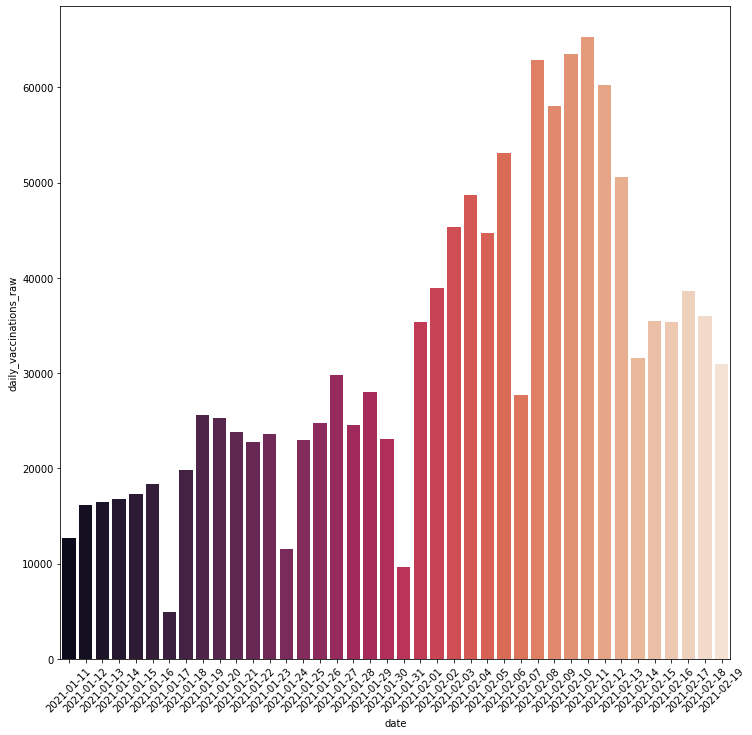

In [33]:
scotland = df[df['country'] == 'Scotland'] # extracting scottish data
scopop = 5.454e6

scotland = scotland[scotland['daily_vaccinations_raw'].notna()]
scotland['daily_perc'] = (scotland['daily_vaccinations_raw']/scopop)*100

plt.figure(figsize=(12,12))
plot = sns.barplot(x='date', y='daily_vaccinations_raw', data=scotland, palette="rocket")

for item in plot.get_xticklabels():
    item.set_rotation(45)

In [34]:
scotland.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,daily_perc
2896,Scotland,NaN,2021-01-11,178799.0,175942.0,2857.0,12664.0,7962.0,3.27,3.22,0.05,1457.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,0.232197
2897,Scotland,NaN,2021-01-12,194955.0,191965.0,2990.0,16156.0,9245.0,3.57,3.51,0.05,1692.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,0.296223
2898,Scotland,NaN,2021-01-13,211397.0,208207.0,3190.0,16442.0,10568.0,3.87,3.81,0.06,1934.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,0.301467
2899,Scotland,NaN,2021-01-14,228171.0,224840.0,3331.0,16774.0,11939.0,4.18,4.12,0.06,2185.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,0.307554
2900,Scotland,NaN,2021-01-15,245436.0,241924.0,3512.0,17265.0,13380.0,4.49,4.43,0.06,2449.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...,0.316557


In [35]:
#rUK

england = df[df['country'] == 'England']
england = england[england['daily_vaccinations_raw'].notna()]
engpop = 55.98e6

Wales = df[df['country'] == 'Wales']
Wales = Wales[Wales['daily_vaccinations_raw'].notna()]
walespop = 3.136e6


NI = df[df['country'] == 'Northern Ireland']
NI = NI[NI['daily_vaccinations_raw'].notna()]
nipop = 1.885e6

rUKtotal1 = england['people_vaccinated'].max() + Wales['people_vaccinated'].max() + NI['people_vaccinated'].max()
rUKtotal2 = england['people_fully_vaccinated'].max() + Wales['people_fully_vaccinated'].max() + NI['people_fully_vaccinated'].max()
rUKpop = engpop + walespop + nipop

total_vaxed = np.sum(scotland['daily_vaccinations'])
perc1st = total_vaxed*100/scopop
perc2nd = np.sum(scotland['people_fully_vaccinated'].max()*100/scopop)
print('Scotland total first round vaccination {:.2f}%'.format(perc1st))
print('Scotland total second round vaccination {:.2f}%'.format(perc2nd))
print('rUK total first round vaccination {:.2f}% \nrUK total second round vaccination {:.2f}%'.format(rUKtotal1*100/rUKpop, rUKtotal2*100/rUKpop))

Scotland total first round vaccination 21.95%
Scotland total second round vaccination 0.61%
rUK total first round vaccination 25.96% 
rUK total second round vaccination 0.94%


In [36]:
n = scotland['country'].count()

avgdp1 = perc1st/n
avgdp2 = perc2nd/n

completiontime1 = (100 - perc1st)/avgdp1 # time in days until full round 1 vaccination based on current trends
completiontime2 = (100 - perc2nd)/avgdp2 # time in days until full round 2

print('Time until round 1 completion {:.2f} months'.format(completiontime1/30.437))

time = completiontime1/30.437
month = int(time)
day = int((time % 1)*30.437)

end = date.today() + relativedelta(months=+month, days=+day)
end2 = date.today() + relativedelta(months=+(month+3), days=+day)
print('Projected round 1 finish date based on overall trends: {}\nProjected round 2 finish date based on overall trends: {}'.format(end, end2))

Time until round 1 completion 4.67 months
Projected round 1 finish date based on overall trends: 2021-07-12
Projected round 2 finish date based on overall trends: 2021-10-12


Time taken for full vaccine(2 rounds) inaccurate due to lack of data, since most first round not yet received 2nd round, should be roughly ~12 weeks after round 1. Majority of population should be vaccinated in time for summer assuming current trends continue. Note that average daily percentage vaccinated is on low side in Scotland due to targetted method, so the time taken may well be much less. Based on current trends, full coverage of all age groups expected October - note that this is on the extremely slow end as based on overall trends including slow start.

With majority coverage expected in early summer and the rUK slightly edging it in performance, we can expect to see rUK lift restrictions likely in the next month or 2 as long as vaccination effectiveness sufficiently high (looks likely) and no vaccine immune or other mutation variants introduced.

A better method may be to look at the 7-day rolling average to get an idea of how long we can expect to see full coverage based on current vaccination methods.

In [37]:
last7 = scotland[32::]

last7avg = last7['daily_perc'].mean()
completiontime1 = (100 - perc1st)/last7avg # time in days until full round 1 vaccination based on current trends

print('Time until round 1 completion {:.2f} months based on 7 day average'.format(completiontime1/30.437))
time = completiontime1/30.437
month = int(time)
day = int((time % 1)*30.437)

end = date.today() + relativedelta(months=+month, days=+day)
end2 = date.today() + relativedelta(months=+(month+3), days=+day)
print('Projected round 1 finish date based on 7-day trends: {}\nProjected round 2 finish date based on 7-day trends: {}'.format(end, end2))

Time until round 1 completion 3.51 months based on 7 day average
Projected round 1 finish date based on 7-day trends: 2021-06-06
Projected round 2 finish date based on 7-day trends: 2021-09-06


This reduces the time taken until round 1 completion by ~1.2 months, predicting full coverage of all age groups by September.

Now calculating how long it will take to fully vaccinate over 45s, i.e the most important age groups necessary for significant relaxation, and how long it will take to vaccinate the population minus under 15s since that is the point which we can most likely consider the vaccination program to have full coverage.

In [39]:
young = 0.8e6  # age groups
teen = 0.6e6
adult = 1.4e6

over45 = scopop - young - teen - adult
over15 = scopop - young

age_groups = {'Over 15s': over15, 'Over 45s': over45}

for key, value in age_groups.items():
    perc1st = total_vaxed*100/value
    perc2nd = np.sum(scotland['people_fully_vaccinated'].max()*100/value)
    completiontime = (100-perc1st)/last7avg


    time = completiontime/30.437
    month = int(time)
    day = int((time % 1)*30.437)

    print('{}:\nTime until round 1 completion {:.2f} months based on 7 day average'.format(key, time))
    end = date.today() + relativedelta(months=+month, days=+day)
    end2 = date.today() + relativedelta(months=+(month+3), days=+day)
    print('Projected round 1 finish date based on 7-day trends: {}\nProjected round 2 finish date based on 7-day trends: {}\n'.format(end, end2))



Over 15s:
Time until round 1 completion 3.34 months based on 7 day average
Projected round 1 finish date based on 7-day trends: 2021-06-01
Projected round 2 finish date based on 7-day trends: 2021-09-01

Over 45s:
Time until round 1 completion 2.47 months based on 7 day average
Projected round 1 finish date based on 7-day trends: 2021-05-06
Projected round 2 finish date based on 7-day trends: 2021-08-05



## Comparing absolute number of vaccinations

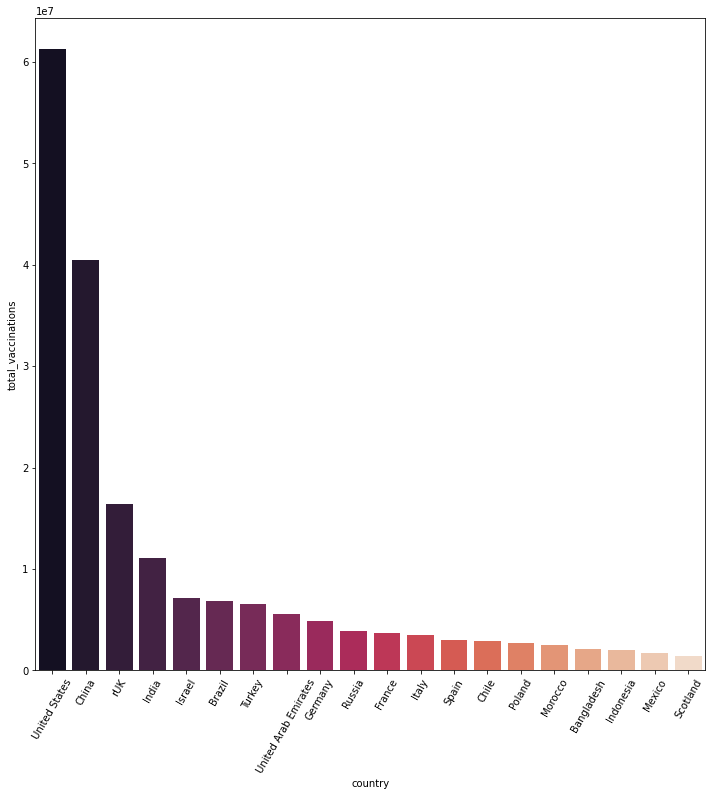

In [40]:
newdf = df.loc[df.groupby('country')['total_vaccinations'].idxmax()]
newdf = newdf[newdf.country != 'United Kingdom'] # removing whole UK from the plot
newdf = newdf[newdf.country != 'England']
newdf = newdf[newdf.country != 'Wales']
newdf = newdf[newdf.country != 'Northern Ireland']
    
newrUKdp = england['total_vaccinations'].max() + Wales['total_vaccinations'].max() + NI['total_vaccinations'].max()
dataf = newdf[['country', 'total_vaccinations']]
dataf = dataf.append({'country':'rUK', 'total_vaccinations': newrUKdp}, ignore_index=True).sort_values(by=['total_vaccinations'], ascending=False)[:20]

plt.figure(figsize=(12,12))
plot = sns.barplot(x='country', y='total_vaccinations', data=dataf, palette='rocket')

for item in plot.get_xticklabels():
    item.set_rotation(60)

## Comparing vaccinations per hundred population

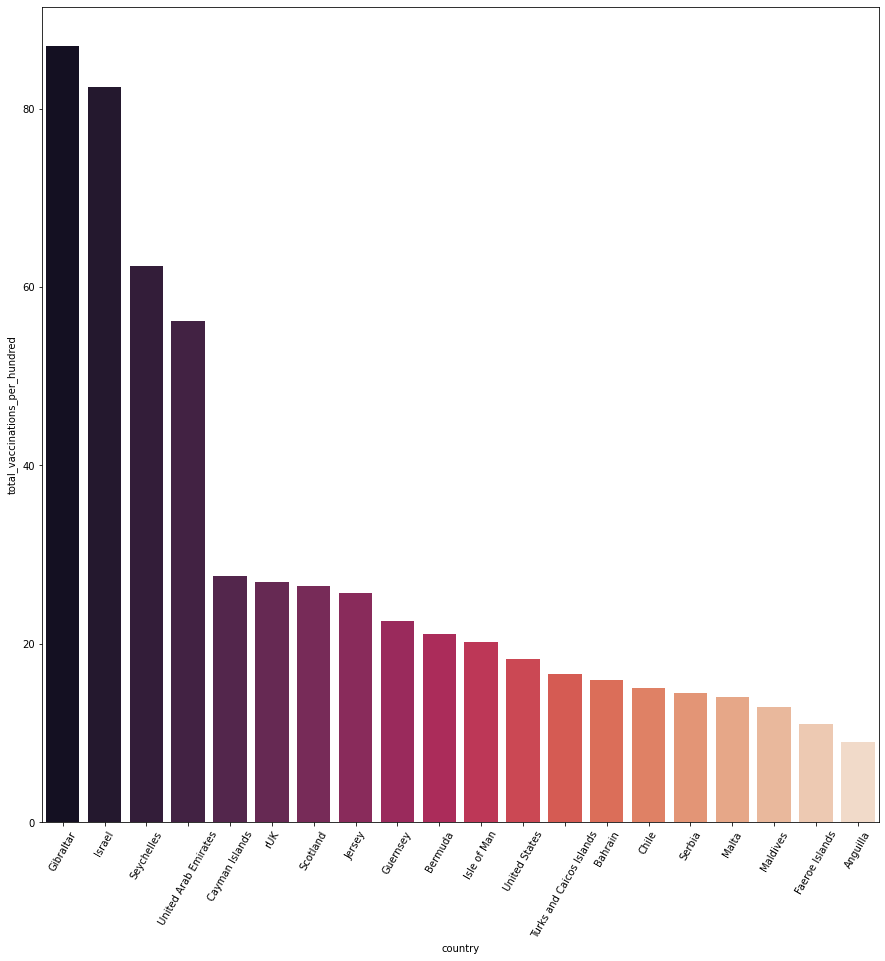

In [41]:
newdf = df.loc[df.groupby('country')['total_vaccinations_per_hundred'].idxmax()]
newdf = newdf[newdf.country != 'United Kingdom'] # removing whole UK from the plot
newdf = newdf[newdf.country != 'England']
newdf = newdf[newdf.country != 'Wales']
newdf = newdf[newdf.country != 'Northern Ireland']

newrUKdp = england['total_vaccinations'].max()/(engpop/100) + Wales['total_vaccinations_per_hundred'].max()/(walespop/100) + NI['total_vaccinations_per_hundred'].max()/(nipop/100)
dataf = newdf[['country', 'total_vaccinations_per_hundred']]
dataf = dataf.append({'country':'rUK', 'total_vaccinations_per_hundred': newrUKdp}, ignore_index=True).sort_values(by=['total_vaccinations_per_hundred'], ascending=False)[:20]

plt.figure(figsize=(15,15))
plot = sns.barplot(x='country', y='total_vaccinations_per_hundred', data=dataf, palette='rocket')

for item in plot.get_xticklabels():
    item.set_rotation(60)

Looking at the top 20 performing countries, we can see that both the rUK and Scotland are performing well in comparison to the rest of the world placing 6th and 7th respectively in vaccinations per 100 population.